In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
global_font={'family' : 'NanumSquare Neo OTF Bold','size' : 12 , 'weight' : 'bold'}
#폰트설정
mpl.rc('font', **global_font)

In [17]:
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

Nanum Pen Script OTF
NanumSquare Neo OTF Light
NanumSquare Neo Bold
NanumMyeongjo YetHangul
NanumBarunGothicOTF
NanumBarunGothic
NanumMyeongjoOTF Eco
NanumMyeongjo Eco
Nanum Brush Script
NanumMyeongjo
NanumBarunGothicOTF YetHangul
NanumMyeongjoOTF
D2Coding ligature
Nanum Brush Script OTF
NanumMyeongjo
NanumSquareRound
NanumSquareRound
NanumSquareRoundOTF
NanumSquareRoundOTF
Noto Sans KR
NanumGothic
NanumSquareRound
NanumMyeongjoOTF
NanumSquareOTF_ac
NanumSquare Neo OTF Bold
Nanum Pen Script
NanumSquareOTF_ac
NanumSquare Neo OTF ExtraBold
NanumSquareOTF
NanumGothicOTF
NanumMyeongjoOTF Eco
NanumMyeongjoOTF Eco
NanumMyeongjoOTF YetHangul
NanumSquare Neo ExtraBold
NanumGothicOTF Eco
NanumMyeongjo
NanumGothic
D2Coding ligature
NanumBarunGothicOTF
NanumSquare_ac
NanumBarunGothicOTF
NanumBarunGothic
NanumGothicOTF Eco
NanumSquareOTF
NanumSquare Neo Light
NanumGothicOTF
NanumSquare_ac
NanumSquareRound
Noto Sans KR
NanumGothicOTF Eco
NanumSquareOTF_ac
NanumBarunpen
Noto Sans KR
NanumSquareOTF_a

In [18]:
# Set font family globally
mpl.rcParams['font.family'] = 'NanumSquare Neo OTF Bold'
print(mpl.rcParams['font.family'])

['NanumSquare Neo OTF Bold']


In [4]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv', index_col="ResponseId")

In [5]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [6]:
schema_raw = pd.read_csv('datas/survey_results_schema.csv',index_col="qname")["question"]

In [7]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [8]:
selected_columns=[
    #인구통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp'
]

In [9]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


# 세미콜론 기준으로 나누기

In [10]:
def split_multicolumn(col_series):
    #변환할 DataFrame
    result_df = col_series.to_frame()
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options=[]
    
    #NaN값을 갖는 row를 제외하고 반복
    for idx,value in col_series[col_series.notnull()].items():
        #value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            #현재 potion이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option]=False
            #파싱한 기술 스텍에 해당하는 column의 값에True를 넣는다.
            result_df.at[idx, option] = True
            #result_df.loc[idx, option] = True
    return result_df[options]

dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",...,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [11]:
survey_df["DevType"]

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [12]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Student                                           5595
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Project manager                                   3897
Designer                                          3764
Engineer, data                                    3600
Engineering manager                               3574
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic r

In [13]:
devtype_percentage = dev_type_totals / dev_type_totals.sum() * 100

In [14]:
devtype_percentage.sum()

100.00000000000001

In [15]:
schema_raw["DevType"]

'Which of the following describes your current job? Please select all that apply.'

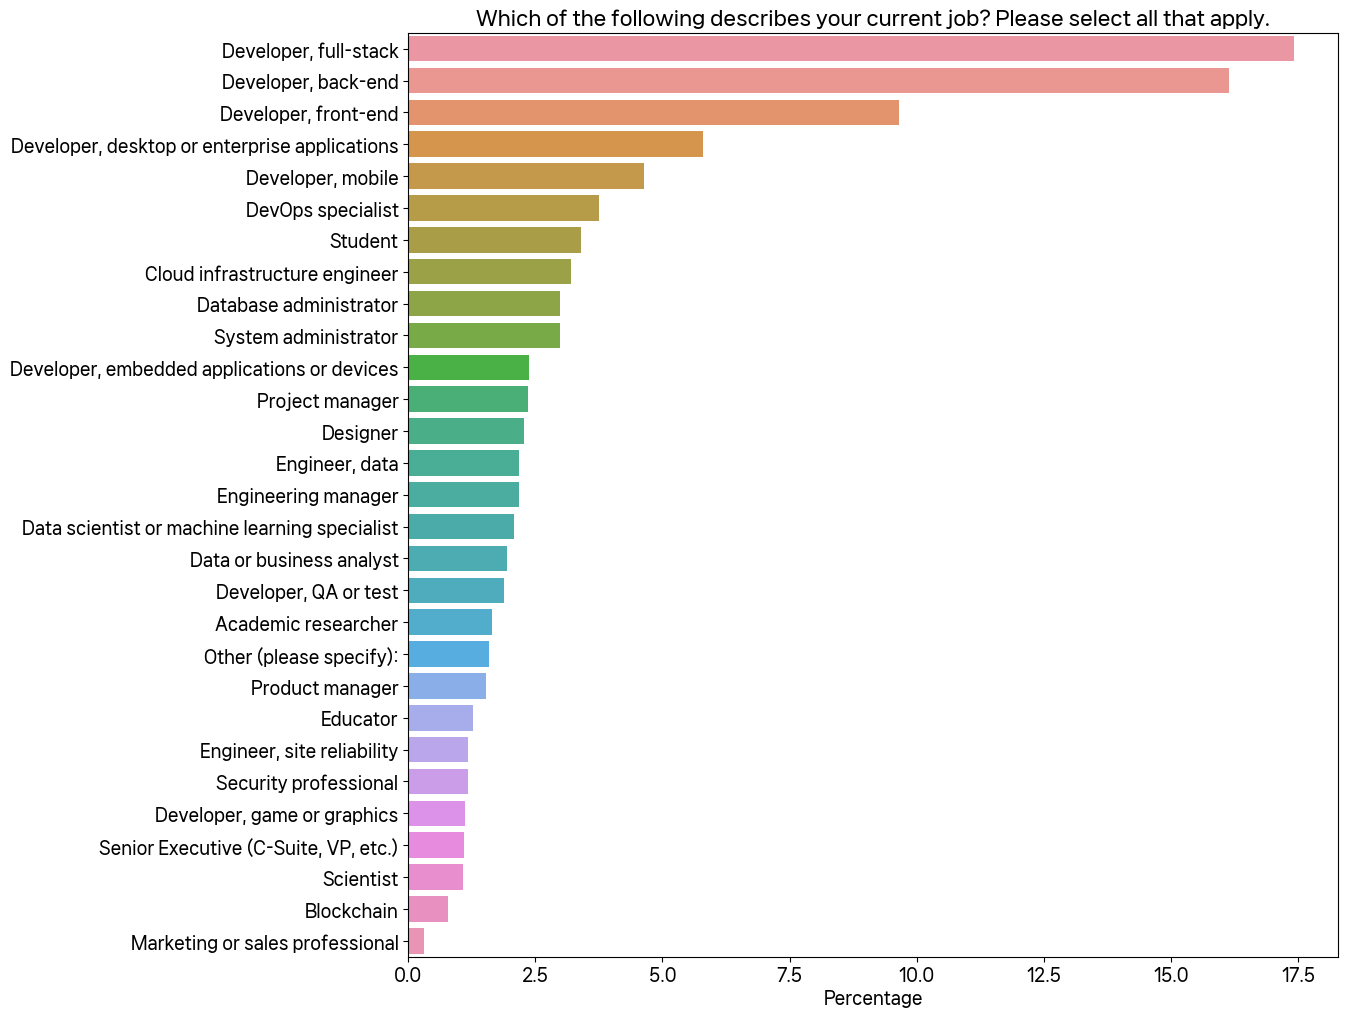

In [16]:
plt.figure(figsize=(12,12))
sns.barplot(x=devtype_percentage , y=devtype_percentage.index)

plt.title(schema_raw["DevType"])
plt.xlabel("Percentage")
plt.show()

## 문제:열의 값 = 여러 값을 갖고있는 것을 확인

In [17]:
survey_df.LanguageHaveWorkedWith

ResponseId
1                                                      NaN
2                                    JavaScript;TypeScript
3                        C#;C++;HTML/CSS;JavaScript;Python
4                             C#;JavaScript;SQL;TypeScript
5              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73264    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266                   HTML/CSS;JavaScript;PHP;Python;SQL
73267                                        C#;Delphi;VBA
73268          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [18]:
#split_mulcolumn()함수를 활용해서  열로 나누어 확인
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
languages_worked_df

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,...,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,True,True,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73266,True,False,False,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [19]:
#각 스텍마다 차지하는 count확인 (ascending=False)내림차순
languages_worked_totals = languages_worked_df.sum().sort_values(ascending=False)
languages_worked_totals

JavaScript     46443
HTML/CSS       39142
SQL            35127
Python         34155
TypeScript     24752
Java           23644
Bash/Shell     20656
C#             19883
C++            16024
PHP            14827
C              13692
PowerShell      8575
Go              7922
Rust            6625
Kotlin          6507
Dart            4648
Ruby            4299
Assembly        3887
Swift           3489
R               3308
VBA             3185
MATLAB          2913
Lua             2867
Groovy          2357
Delphi          2311
Scala           1837
Objective-C     1698
Perl            1644
Haskell         1577
Elixir          1528
Julia           1084
Clojure         1070
Solidity        1031
LISP             932
F#               730
Fortran          646
Erlang           641
APL              504
COBOL            464
SAS              435
OCaml            422
Crystal          340
dtype: int64

# 차지하는 비율 계산 value_counts(True)

### 합이 100이 안됨 = 고정 소수점 방식의 특징

In [20]:
languages_worked_percentages = languages_worked_totals / languages_worked_totals.sum() *100
languages_worked_percentages

JavaScript     12.626522
HTML/CSS       10.641589
SQL             9.550026
Python          9.285767
TypeScript      6.729360
Java            6.428127
Bash/Shell      5.615775
C#              5.405618
C++             4.356467
PHP             4.031037
C               3.722463
PowerShell      2.331297
Go              2.153765
Rust            1.801148
Kotlin          1.769067
Dart            1.263658
Ruby            1.168775
Assembly        1.056764
Swift           0.948559
R               0.899350
VBA             0.865910
MATLAB          0.791961
Lua             0.779455
Groovy          0.640801
Delphi          0.628295
Scala           0.499428
Objective-C     0.461638
Perl            0.446957
Haskell         0.428741
Elixir          0.415419
Julia           0.294709
Clojure         0.290902
Solidity        0.280299
LISP            0.253384
F#              0.198466
Fortran         0.175629
Erlang          0.174270
APL             0.137023
COBOL           0.126148
SAS             0.118264


In [21]:
languages_worked_percentages.sum()

100.0

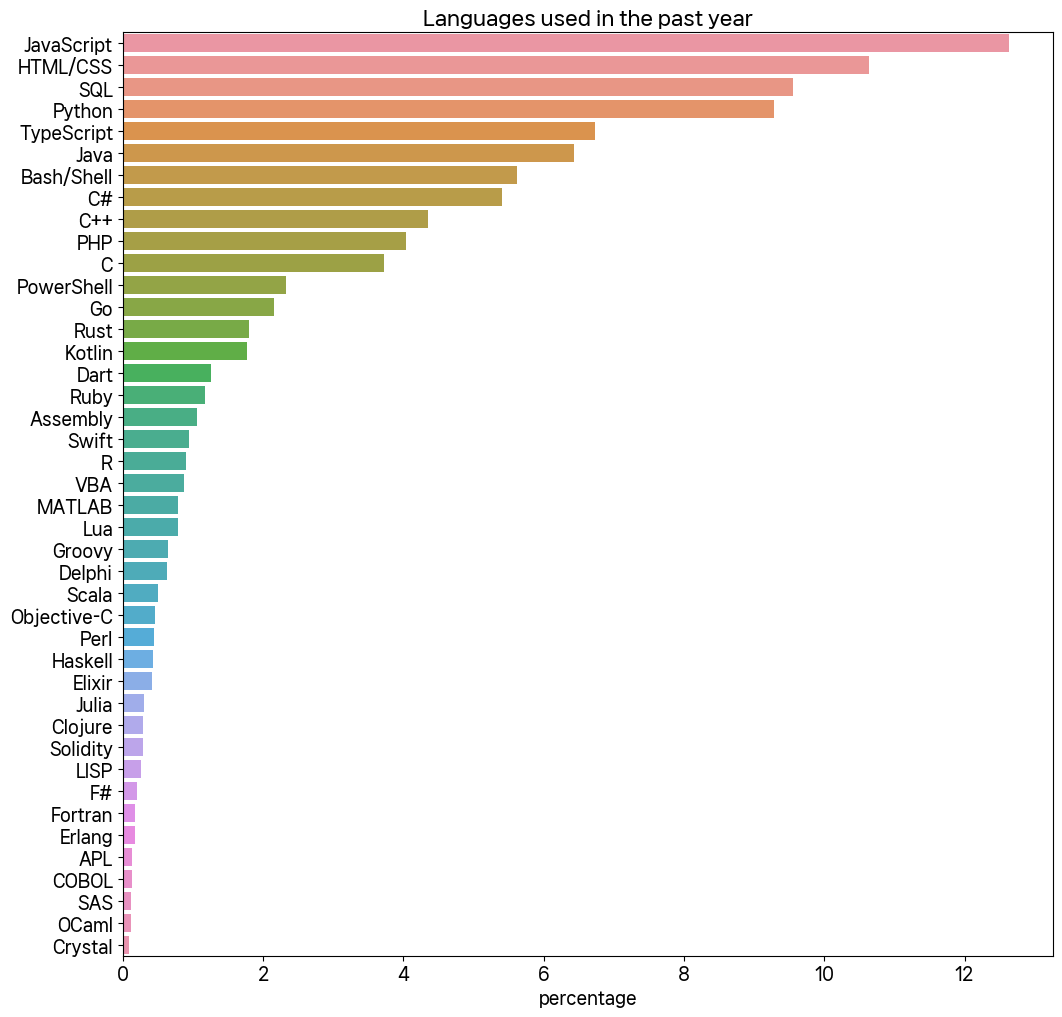

In [22]:
plt.figure(figsize = (12,12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year")
plt.xlabel('percentage')
plt.show()

# folium - 지도 데이터 시각화

In [1]:
import folium

## 위도 경도 저장

In [6]:
latitude,longitude = (37.496996,126.927612)

In [7]:
m = folium.Map(location=[latitude,longitude],
               zoom_start=17,
               width=750,
               height=500
              )
m

In [13]:
popup_tag = """
    <div style = 'width':100px'>
        <a href = "https://playdata.io/">
            플레이 데이터
        </a>
    </div>
"""

## Marker위치에 대한 정보

In [15]:
folium.Marker([latitude,longitude],
              popup=popup_tag,
              tooltip='플레이데이터',
             ).add_to(m)
m

# Stack Overflow Annual Developer Survey

## csv파일 불러오기

In [21]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv',index_col="ResponseId")

## json 파일 주소 담기

In [30]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

## 지도에 활용할 DataFrame만들기

country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country':country_counts.index,
                                  'Count':country_counts.values})
country_counts_df

In [24]:
country_counts_df.at[12,'Country']

'Russian Federation'

In [25]:
country_counts_df.at[12,'Country'] = 'Russia'

# folium.Choropleth 함수

In [32]:
m=folium.Map(location=[30,0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country","Count"],
    key_on="feature.properties.name",
    threshold_scale=[1,30,100,300,1_000,3_000,10_000,14_000],
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [33]:
m.save("Country.html")

In [40]:
seoul_geojson = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

#Map -> 위도 경도 크기정도
m= folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)

#위치 기록된 geojson, 색, 선크기
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=.4,
    line_opacity=1
).add_to(m)
m

In [1]:
from wordcloud import WordCloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv',index_col='ResponseId')

In [5]:
dev_type=survey_raw_df.DevType.copy()

In [6]:
dev_type.dropna(inplace=True)

In [9]:
dev_type = dev_type.str.replace(";"," ").str.replace(","," ")

In [10]:
words = ' '.join(dev_type)

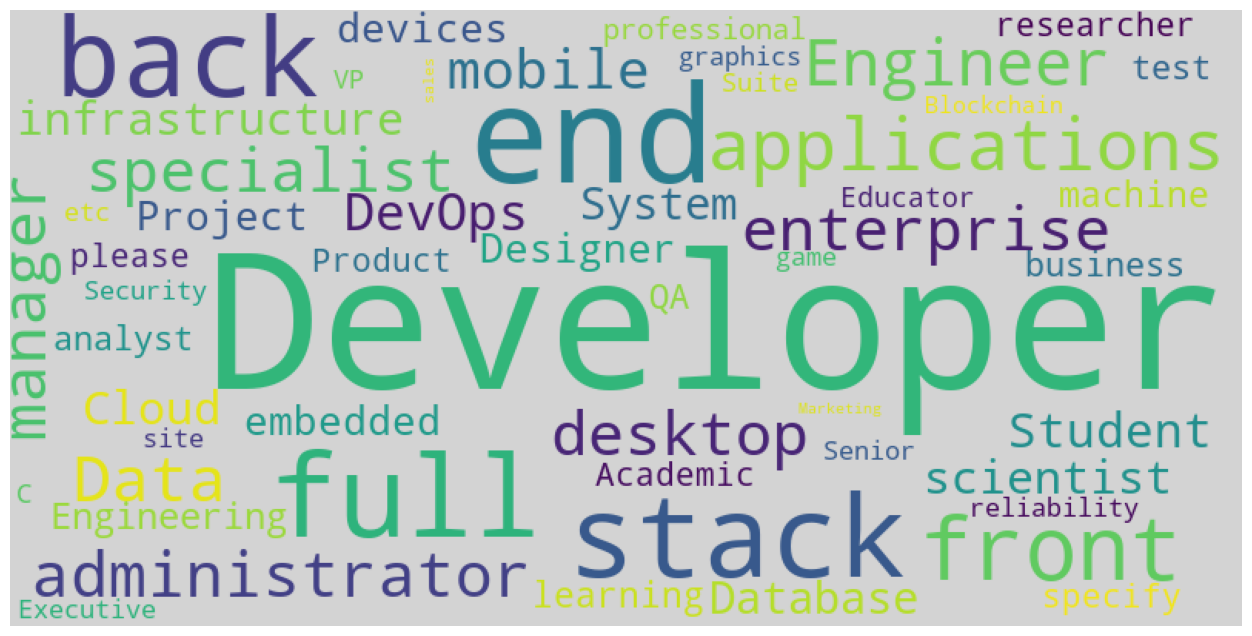

In [13]:
import matplotlib.pyplot as plt

wc=WordCloud(collocation_threshold=int(1e6),
             width=800, height=400,
             background_color="lightgrey").generate(words)
plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc)
plt.show()

In [14]:
wc.to_file("datas/DevType.png")